# Apple Regression Analysis

**This analysis was completed as part of my Intermediate Financial Management (FIN 425) course project at Washington State University.**

## Purpose

This notebook aims to analyze the systematic risks associated with a new smartphone manufacturing and launch project that a firm is considering. Given the significant investment required for this project, the firm desires a more in-depth understanding of the systematic risk and is seeking recommendations to make an informed decision.

The Scenario:

As a financial analyst for theoretical smartphone manufacturer I am tasked with providing an analysis of the smartphone industry's market risk to the company's CEO. This theoretical company wants to use behavior of Apple Inc.'s (AAPL) stock, a leading firm in the industry and its main competitor, as a proxy for the industry as a whole. The company is considering a new smartphone manufacturing and launch project, but is concerned about the significant investment required.

## Methodology

The weekly adjusted close of the previous 5 years (ending 12/31/2022) will be collected from yahoo finance. The market benchmark used is the return of the S&P 500 index (ticker ^GSPC) and the risk-free rate will be based on the 13 week T-Bill (ticker ^IRX).

In order to provide an accurate analysis of the smartphone industry's market risk, data over a relatively long period must be considered. However, the smartphone industry is relatively fast paced, new products are released every year and major competitors have entered or left the market. 10 years ago (in 2012) Blackberry and Nokia were still household names in the industry, thus a time frame of 5 years (from 2017) will provide a more accurate representation of the current smartphone market.

In addition, the past five years encompasses pre-COVID, COVID shutdown, and post-COVID periods. So, the analysis will reflect the market performance under relatively "normal" circumstances, a sharp contraction/recession (as a result of the pandemic shutdowns), and a rapid expansion (due to the lifting of pandemic shutdowns), offering a comprehensive view of the market under various economic conditions.

 A 1-week interval will ensure that smaller, more “random,” daily fluctuations in the market are smoothed out. This will provide a more accurate representation of returns. Also, a weekly time frame offers a greater number of data points compared to a monthly time frame, thereby resulting in a more precise regression analysis.

The S&P 500 index is the most commonly employed benchmark to represent the overall market, while a short-term T-Bill rate is typically considered the risk-free rate of return. Ideally, the 4-week T-Bill rate would be used since it carries the lowest risk compared to other T-Bills, which already have very low-risk levels. However, historical data for the 4-week rate is not easily accessible, while the IRX ticker symbol readily offers the 13-week T-Bill yield. Given that T-Bills are already very low-risk, the 13-week rate is a suitable proxy for the risk-free interest rate.

## Data Collection


In [76]:
import yfinance as yf
import pandas as pd

# Get weekly data for Apple, the S&P 500, and the Risk free rate (13 week T-bill) from Yahoo finance
data: pd.DataFrame = yf.download(tickers = "AAPL ^GSPC ^IRX", start="2017-12-24", end="2022-12-31", interval="1wk", ignore_tz=True)

# Only want the adjusted close data
data = data["Adj Close"]

# Display some summary stuff
display(data.head())
data.describe()

[*********************100%***********************]  3 of 3 completed


,AAPL,^GSPC,^IRX
Date,,,
2017-12-25,40.168858,2673.610107,1.355
2018-01-01,41.538441,2743.149902,1.370
2018-01-08,42.034523,2786.239990,1.410
2018-01-15,42.359707,2810.300049,1.403
2018-01-22,40.710045,2872.870117,1.388


,AAPL,^GSPC,^IRX
count,262.000000,262.000000,262.00000
mean,96.307888,3447.542865,1.26129
std,46.616206,670.078326,1.14378
min,35.719704,2304.919922,-0.05800
25%,49.386446,2842.040100,0.08300
50%,88.206627,3270.540039,1.50400
75%,141.306679,4049.774963,2.09975
max,178.142502,4766.180176,4.26000


### Convert prices to risk-adjusted rates

In [77]:
# Convert the prices of the S&P and Apple to their percentage change from the previous week (weekly rate of return)
previous_day = data.shift(1)
data.iloc[:, :2] = (data.iloc[:, :2] - previous_day.iloc[:, :2]) / previous_day.iloc[:, :2] * 100

# Divide the risk-free rate by 52 to convert from annual to weekly
data["^IRX"] = data["^IRX"] / 52

# Drop the first column since its rate is undefined
data.dropna(inplace=True)
print("Prices and the risk-free rate converted to their weekly rates of return:")
display(data.head())

# Give the returns adjusted by the risk-free rate
data = data[["AAPL", "^GSPC"]].sub(data["^IRX"], axis=0)
print("Returns adjusted by risk-free rate:")
data.head()

Prices and the risk-free rate converted to their weekly rates of return:


,AAPL,^GSPC,^IRX
Date,,,
2018-01-01,3.409565,2.600970,0.026346
2018-01-08,1.194273,1.570825,0.027115
2018-01-15,0.773611,0.863531,0.026981
2018-01-22,-3.894413,2.226455,0.026692
2018-01-29,-6.419479,-3.854690,0.027885


Returns adjusted by risk-free rate:


,AAPL,^GSPC
Date,,
2018-01-01,3.383218,2.574624
2018-01-08,1.167157,1.543710
2018-01-15,0.746631,0.836551
2018-01-22,-3.921106,2.199763
2018-01-29,-6.447364,-3.882575


## Plots and Regression Analysis 

In [78]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Plot colors
PRIMARY_COLOR = "#1799E7"
SECONDARY_COLOR = "black"
DASH_COLOR = "dimgrey"

### Regression Model

In [79]:
# S&P 500 is the independent variable and Apple is the dependent variable
x = sm.add_constant(data['^GSPC'])
y = data['AAPL']

# Fit a simple linear regression model
model = sm.OLS(y, x).fit()

### SCL Plot

/var/folders/d6/rpd6b_591txdmpf_4f2f21740000gn/T/ipykernel_20068/3378242753.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['{:.0f}%'.format(x) for x in plot.get_xticks()])
/var/folders/d6/rpd6b_591txdmpf_4f2f21740000gn/T/ipykernel_20068/3378242753.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(['{:.0f}%'.format(y) for y in plot.get_yticks()])


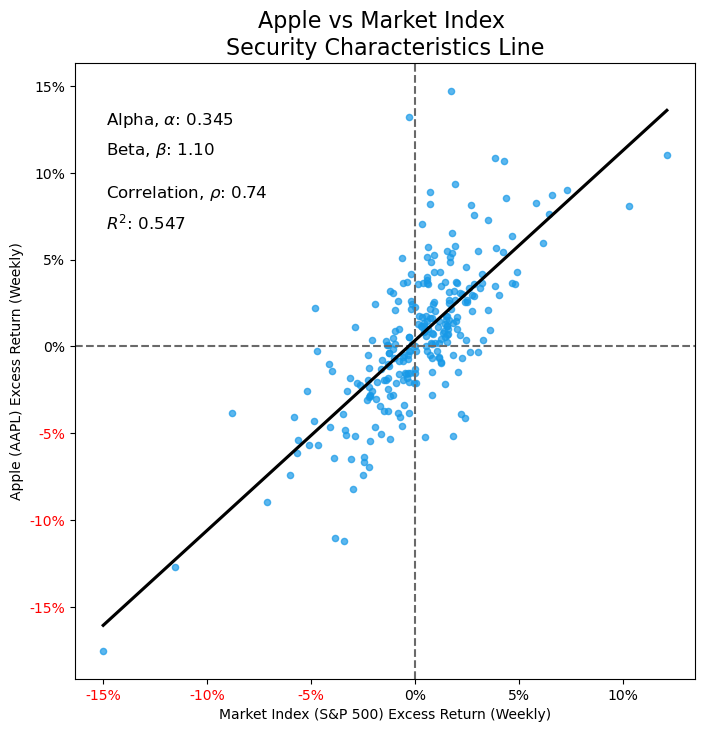

In [80]:
plt.figure(figsize=(8, 8))

# Create a scatter plot with regression line
plot = sns.regplot(x='^GSPC', y='AAPL', data=data, line_kws={
                   'color': SECONDARY_COLOR, 'zorder': 999}, scatter_kws={"color": PRIMARY_COLOR, 'alpha': 0.7, 's': 20}, ci=None)

# Get the y-intercept (alpha) and slope (beta) from the regression model
alpha = model.params[0]
beta = model.params[1]

# Annotate the plot with the alpha and beta values
plt.annotate('Alpha, $\\alpha$: {:.3f}'.format(round(alpha, 3)), xy=(
    0.05, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate('Beta, $\\beta$: {:.2f}'.format(round(beta, 2)), xy=(
    0.05, 0.85), xycoords='axes fraction', fontsize=12)

# Annotate the plot with the R^2 value and correlation coefficient
correlation = data['AAPL'].corr(data['^GSPC'])
r_squared = model.rsquared
plt.annotate('Correlation, $\\rho$: {:.2f}'.format(round(correlation, 2)), xy=(
    0.05, 0.78), xycoords='axes fraction', fontsize=12)
plt.annotate('$R^2$: {:.3f}'.format(round(r_squared, 3)), xy=(
    0.05, 0.73), xycoords='axes fraction', fontsize=12)

# Show the origin on the plot
plt.axvline(0, color=DASH_COLOR, linestyle='--')
plt.axhline(0, color=DASH_COLOR, linestyle='--')

# Format the ticks to be percentages
plot.set_xticklabels(['{:.0f}%'.format(x) for x in plot.get_xticks()])
plot.set_yticklabels(['{:.0f}%'.format(y) for y in plot.get_yticks()])

# change the color of the negative percentage ticks to red
[plot.get_yticklabels()[i].set_color('red') if (plot.get_yticks()[i] < 0)
 else None for i in range(len(plot.get_yticklabels()))]
[plot.get_xticklabels()[i].set_color('red') if (plot.get_xticks()[i] < 0)
 else None for i in range(len(plot.get_xticklabels()))]

# Show the SCL plot
plt.title("Apple vs Market Index \nSecurity Characteristics Line", fontsize=16)
plt.xlabel('Market Index (S&P 500) Excess Return (Weekly)')
plt.ylabel('Apple (AAPL) Excess Return (Weekly)')
plt.show()

### Residual Plots and Model Statistics

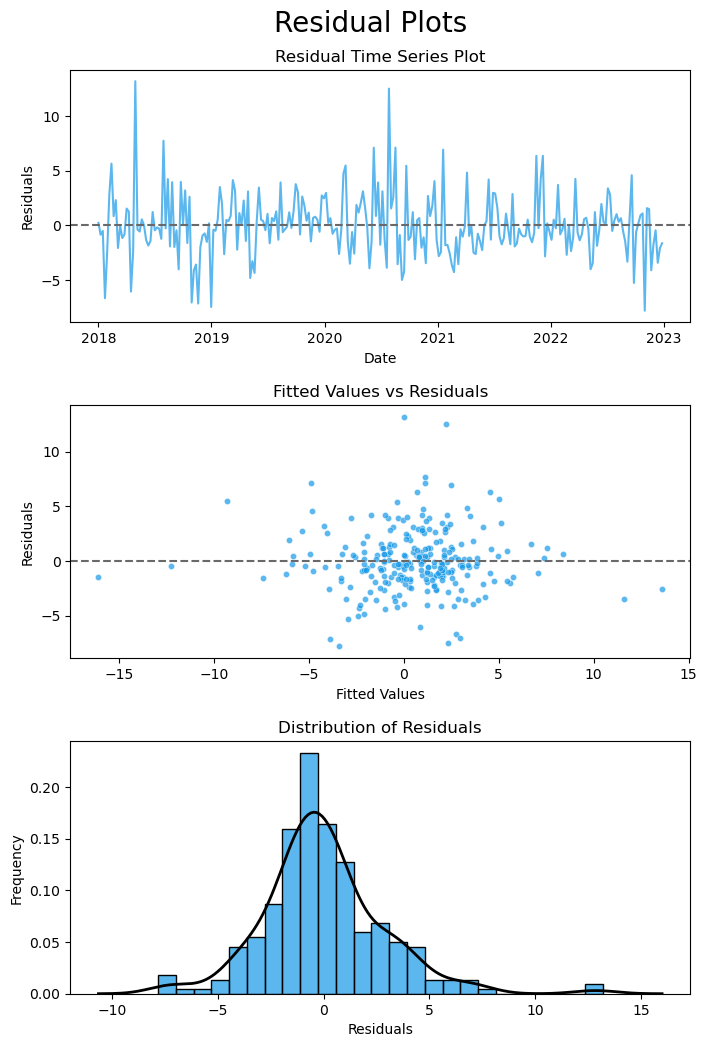

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     312.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.18e-46
Time:                        11:35:10   Log-Likelihood:                -643.59
No. Observations:                 261   AIC:                             1291.
Df Residuals:                     259   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3450      0.177      1.946      0.0

In [81]:
res_plots, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Get the residuals from the regression model
residuals = model.resid

# Create residual time series plot
sns.lineplot(data=residuals, color=PRIMARY_COLOR, alpha=0.7, ax=axs[0])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residual Time Series Plot')
axs[0].axhline(0, color=DASH_COLOR, linestyle='--')

# Create fitted values by the model vs residuals
sns.scatterplot(y=residuals, x=model.fittedvalues, color=PRIMARY_COLOR, alpha=0.7, s=20, ax=axs[1])
axs[1].set_title('Fitted Values vs Residuals')
axs[1].set_ylabel('Residuals')
axs[1].set_xlabel('Fitted Values')
axs[1].axhline(0, color=DASH_COLOR, linestyle='--')

# Create a histogram and kde of the residuals
sns.histplot(residuals, ax=axs[2], color=PRIMARY_COLOR, alpha=0.7, stat='density')
sns.kdeplot(residuals, ax=axs[2], color=SECONDARY_COLOR, linewidth=2)
axs[2].set_title('Distribution of Residuals')
axs[2].set_ylabel('Frequency')
axs[2].set_xlabel('Residuals')

# Adjust and show the plots
plt.subplots_adjust(hspace=0.33)
res_plots.suptitle("Residual Plots", fontsize=20, y=0.93)
plt.show(res_plots)

# Show the summary statistics of the model
print(model.summary())

## Analysis

There is strong evidence that this regression model satisfies its assumptions, therefore conclusions drawn using statistical tests are likely to be reliable:

1. Linear relationship
   * A correlation coefficient of 0.74 and the SCL plot suggest a strong linear relationship between the returns of the market and the returns of Apple.
2. Independence of residuals
   * The residual time series plot shows no evidence of autocorrelation.
   * The Durbin-Watson statistic is 1.927 (very close to 2), indicating that the residuals are independent.
3. Homoscedasticity (the residuals have constant variance at every level of x)
   * The fitted values vs residual plot reflects a pretty constant variance of residuals around 0 for any given value of the market's return, nearly all the residuals are within +/- 5 of 0 regardless of the predicted value.
4. Normality (the residuals are normally distributed)
   * An approximate normal distribution of residuals is evident from the distribution of residuals plot

### Market Risk

The p-value of the beta coefficient is essentially 0 which is strong evidence to reject the null hypothesis that the slope is 0 (i.e. reject that there is no significant relationship between the returns of the market and the returns of Apple's stock). Combined with the strong correlation coefficient, we can soundly conclude that there is a strong and significant relationship between the returns of the market and the returns of Apple's stock.

An R-squared value of around 0.55 suggests that the market accounts for about 55% (over half) of the variability of Apple's stock returns. This is a moderately high R-squared value, which implies that the SCL is a good estimator of Apple's *historical* returns based on the market return. Barring significant disturbances in the smartphone industry relative to the market, it might be reasonable to assume that the SCL could roughly predict returns in the near future based on an estimated return of the market. In addition, the p-value of the f-statistic is essentially 0 which is strong evidence to reject the null hypothesis that the regression model has no predictive power.

Given these statistics, we can conclude that the market is a very significant factor in determining the returns of Apple's stock and thereby sensitive to market risk. It can be inferred that the smartphone industry is also susceptible to market volatility using Apple as a proxy.

#### Market Volatility - Beta

The beta of Apple's stock is 1.10 which suggests that Apple is more volatile than the general market (a beta of 1). Using Apple as a proxy for the smartphone industry as a whole, we can infer that it is more volatile than the broader market. When the economy is doing well, the industry is expected to have higher returns than the general market, but during economic downturns, such as recessions, the industry is more severely impacted than the broader market. The expected return of the smartphone industry is 1.1 times the return of the market.

This makes sense given the nature of the smartphone industry since the demand for smartphones is sensitive to the overall condition of the economy. People don't *need* a new smartphone every year, but many may want one. A new smartphone would be considered a "discretionary" purchase, and consumers are more likely to cut back on discretionary purchases in an economic downturn. In a good economy more people can afford the luxury of a new phone.

#### Risk Adjusted Return - Alpha 

The alpha of Apple's stock is 0.345 which suggests that Apple "beats the market" by 0.345% on average after adjusting for its level of risk. With a a p-value of 0.053 at a significance level of 5%  I'd still argue that it would be reasonable to reject the null hypothesis that the alpha coefficient is equal to 0 (that the stock neither beats nor under-performs the market). Thus, Apple is expected to beat the market on average given its level of risk and is underpriced as there are above-average returns that are not being captured by its level of risk. Using Apple as a proxy for the smartphone industry as a whole, we can infer that the industry is expected to slightly outperform the market on a risk-adjusted basis, if at all.

However, this alpha is relatively small, so Apple's return could be sufficiently explained by beta alone which means that Apple's returns (and the return of the smartphone industry) is very dependent on the performance of the broader market.

## Summary

The smartphone industry, and by extension the success of the new project, is likely to be very dependent on the conditions of the overall economy. The returns of the project are expected to be inline with the overall market return adjusted for the smartphone industry's risk (measured with a beta value of 1.10). Therefore, if the economy is strong, launching a new phone is likely to have high demand and yield higher returns than the overall market, a positive outcome for the company. However, if the economy experiences a significant downturn, the new project may fail to turn a profit.

If the economy is anticipated to be favorable, the firm should definitely proceed with the project. If the economy is predicted to stagnate or have a slight downturn the firm should weigh the risks and rewards of the project to decide whether or not to proceed.